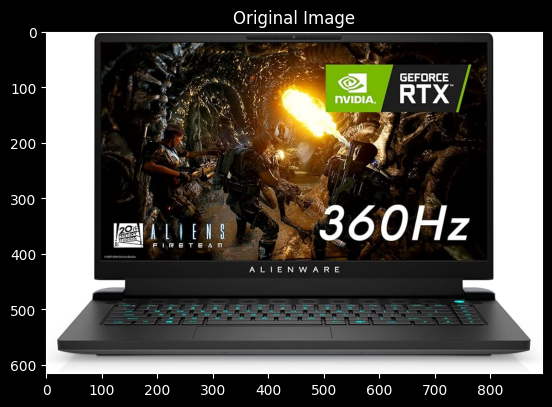

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('laptop.jpg')
if img is None:
    print("Khong tim thay file image")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.show()


###  Color Space Conversion


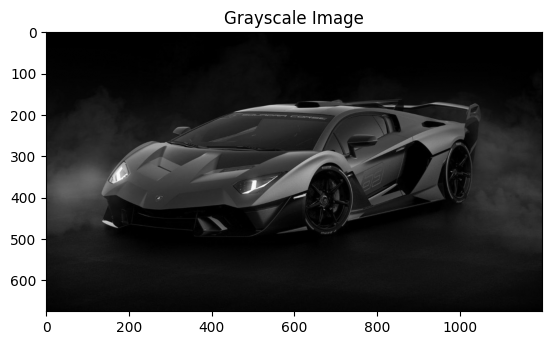

In [3]:
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()


### BT2.2: Xoay ảnh (Rotate)


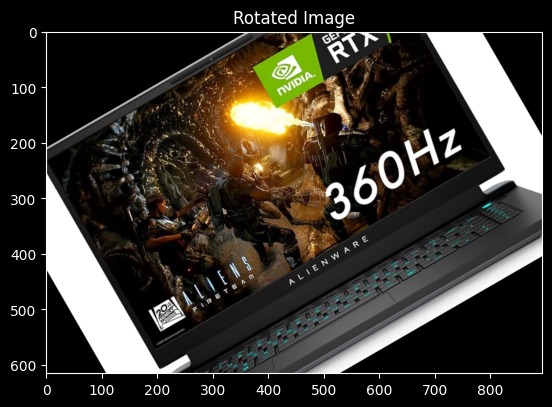

In [6]:
if img is not None:
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    # Xoay 45 độ quanh tâm ảnh
    M = cv2.getRotationMatrix2D(center, 30, 1.0)
    rotated = cv2.warpAffine(img_rgb, M, (w, h))
    plt.imshow(rotated)
    plt.title('Rotated Image')
    plt.show()


### BT2.3: Cắt ảnh (Crop)


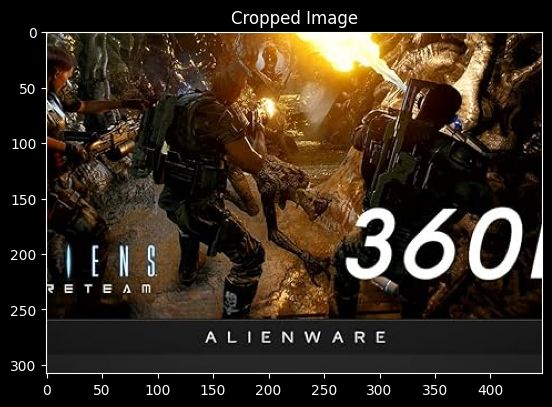

In [7]:
if img is not None:
    # Cắt phần trung tâm của ảnh
    start_row, start_col = int(h * .25), int(w * .25)
    end_row, end_col = int(h * .75), int(w * .75)
    cropped = img_rgb[start_row:end_row, start_col:end_col]
    plt.imshow(cropped)
    plt.title('Cropped Image')
    plt.show()


### BT2.4: Thay đổi kích thước (Resize)


In [ ]:
Em có 1 file .py viết riêng để tiện minh họa cho câu này ạ

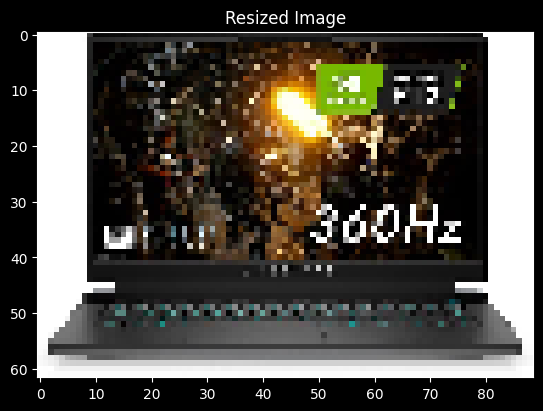

In [8]:
if img is not None:
    # Resize phóng to (Upscaling) - Tăng kích thước hiển thị nhưng không tăng độ chi tiết gốc
    # Sử dụng INTER_CUBIC để chất lượng tốt hơn khi phóng to
    resized_big = cv2.resize(img_rgb, (0, 0), fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)
    plt.imshow(resized_big)
    plt.title('Resized Image')
    plt.show()


### BT2.4.1: Co giãn theo tâm (0,0) và giữ nguyên kích thước khung hình
Khác với `cv2.resize` làm thay đổi kích thước toàn bộ tệp ảnh, phương pháp này sử dụng **Ma trận biến đổi Affine** để thu nhỏ/phóng to nội dung ảnh nhưng vẫn giữ nguyên kích thước khung hình gốc (ví dụ: khung vẫn là 1200x1200 nhưng ảnh bên trong nhỏ lại về phía góc 0,0).


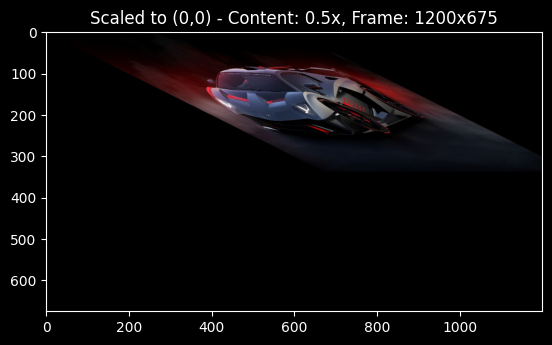

In [42]:
if img is not None:
    scale_factor = 0.5
    
    # Ma trận biến đổi: [scale_x, 0, 0], [0, scale_y, 0]
    M_scale = np.float32([[scale_factor, 1, 0], [0, scale_factor, 0.5]])
    
    # Kích thước đầu ra giữ nguyên (w, h)
    scaled_content = cv2.warpAffine(img_rgb, M_scale, (w, h))
    
    plt.imshow(scaled_content)
    plt.title(f'Scaled to (0,0) - Content: {scale_factor}x, Frame: {w}x{h}')
    plt.show()


### Co giãn theo hướng (Directional Scaling)
Chúng ta có thể co giãn ảnh theo một chiều nhất định (X hoặc Y) bằng cách thay đổi các tham số `fx` (chiều ngang) và `fy` (chiều dọc) khác nhau.


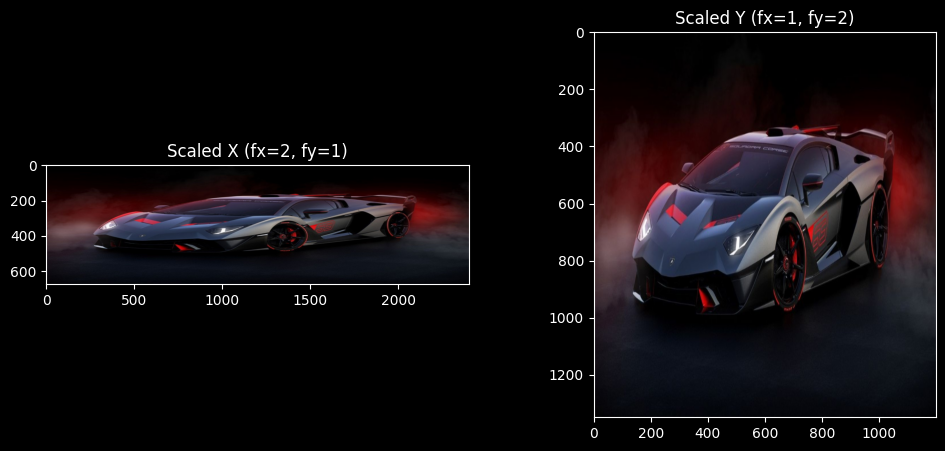

In [36]:
if img is not None:
    # Co giãn theo chiều ngang (X-axis) - làm ảnh dẹt ra
    scale_x = cv2.resize(img_rgb, (0, 0), fx=2, fy=1, interpolation=cv2.INTER_LINEAR)
    
    # Co giãn theo chiều dọc (Y-axis) - làm ảnh cao lên
    scale_y = cv2.resize(img_rgb, (0, 0), fx=1, fy=2, interpolation=cv2.INTER_LINEAR)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(scale_x)
    plt.title('Scaled X (fx=2, fy=1)')
    
    plt.subplot(1, 2, 2)
    plt.imshow(scale_y)
    plt.title('Scaled Y (fx=1, fy=2)')
    plt.show()


### Làm sao để ảnh bớt "vỡ" khi Resize?
Khi thu nhỏ hoặc phóng to, việc chọn phương pháp **Nội suy (Interpolation)** rất quan trọng để giữ chất lượng ảnh:
1. **`cv2.INTER_AREA`**: Tốt nhất khi **thu nhỏ** ảnh (giúp tránh hiện tượng vỡ/răng cưa).
2. **`cv2.INTER_CUBIC`** hoặc **`cv2.INTER_LANCZOS4`**: Tốt nhất khi **phóng to** (cho ảnh mượt hơn).
3. **`cv2.INTER_LINEAR`**: Cân bằng giữa tốc độ và chất lượng (mặc định).


In [ ]:
if img is not None:
    # Thu nhỏ 4 lần với INTER_AREA (giảm thiểu vỡ hình)
    small_smooth = cv2.resize(img_rgb, (0, 0), fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
    
    plt.imshow(small_smooth)
    plt.title('Small Image (INTER_AREA)')
    plt.show()


### So sánh Resize và Giảm độ phân giải (Resolution)

**Resize (Thay đổi kích thước):** 
- Là thuật ngữ chung để chỉ việc thay đổi số lượng pixel của ảnh (có thể tăng - Upscaling hoặc giảm - Downscaling).
- Khi **phóng to (Upscaling)**: OpenCV sử dụng các thuật toán nội suy (như Linear, Cubic) để "đoán" các pixel mới. Ảnh to hơn nhưng không sắc nét hơn ảnh gốc vì thông tin thực tế không tăng thêm.

**Giảm độ phân giải (Lowering Resolution):**
- Là quá trình **Downscaling** (giảm kích thước ảnh).
- Khi giảm số lượng pixel, chúng ta thực sự **loại bỏ thông tin** của ảnh. 
- Nếu sau khi giảm độ phân giải, ta phóng to ảnh lại kích thước cũ, ảnh sẽ bị hiện tượng "pixelated" (vỡ hình) vì thông tin chi tiết đã bị mất vĩnh viễn ở bước giảm.


### Giảm độ phân giải (Lower Resolution)


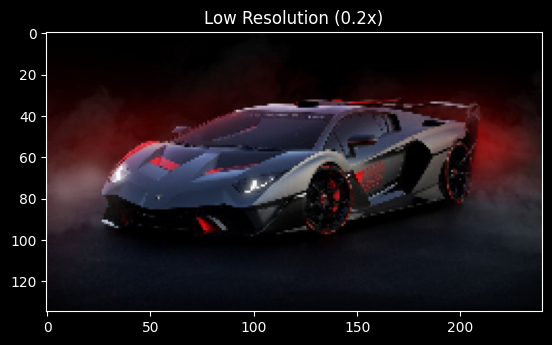

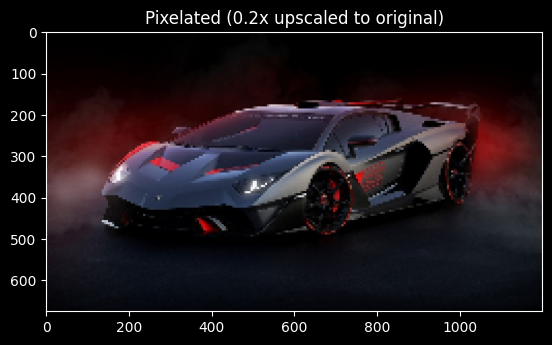

In [30]:
if img is not None:
    # Giảm độ phân giải bằng cách giảm kích thước ảnh (ví dụ: còn 0.5 lần)
    # Sau đó có thể phóng to lại kích thước cũ để thấy độ mờ (pixelated)
    low_res = cv2.resize(img_rgb, (0,0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
    
    # Hiển thị ảnh độ phân giải thấp
    plt.imshow(low_res)
    plt.title('Low Resolution (0.2x)')
    plt.show()
    
    # Phóng to lại kích thước gốc để thấy rõ sự giảm chất lượng
    back_to_original = cv2.resize(low_res, (w, h), interpolation=cv2.INTER_NEAREST)
    plt.imshow(back_to_original)
    plt.title('Pixelated (0.2x upscaled to original)')
    plt.show()


### Làm mờ (Blur)


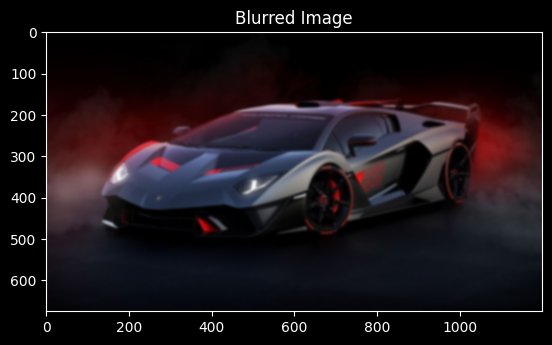

In [6]:
if img is not None:
    # Sử dụng Gaussian Blur
    blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)
    plt.imshow(blurred)
    plt.title('Blurred Image')
    plt.show()


### Thresholding


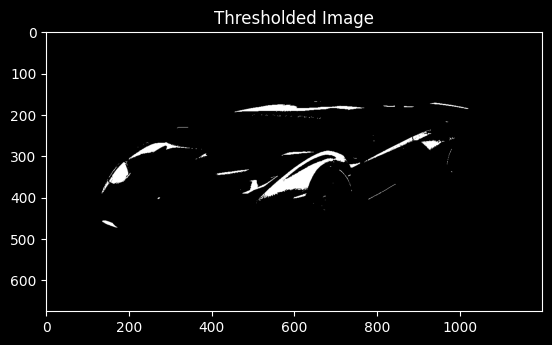

In [7]:
if img is not None:
    # Chuyển sang ảnh nhị phân với ngưỡng 127
    _, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()


### Tìm biên (Boundary/Edge detection)


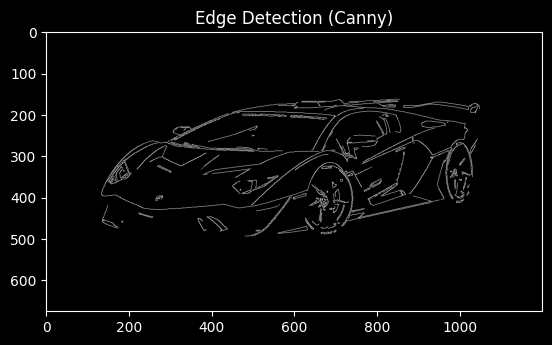

In [8]:
if img is not None:
    # Sử dụng thuật toán Canny để tìm biên
    edges = cv2.Canny(gray_img, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)')
    plt.show()


### Lọc nhiễu (Noise Filtering)


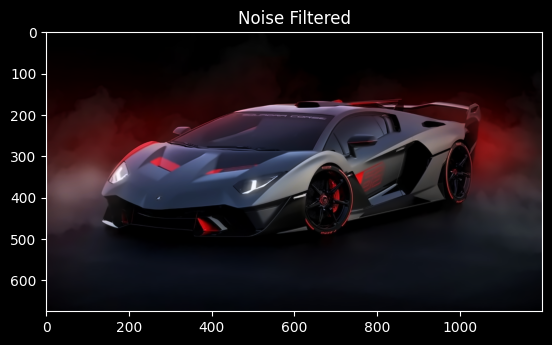

In [9]:
if img is not None:
    # Lọc nhiễu ảnh màu
    noise_filtered = cv2.fastNlMeansDenoisingColored(img_rgb, None, 10, 10, 7, 21)
    plt.imshow(noise_filtered)
    plt.title('Noise Filtered')
    plt.show()


### Foreground Mask



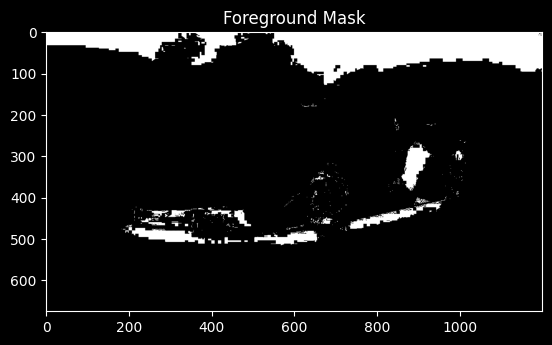

In [11]:
if img is not None:
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = fgbg.apply(img)
    plt.imshow(fgmask, cmap='gray')
    plt.title('Foreground Mask')
    plt.show()


### Mean Subtraction (Trừ trung bình)


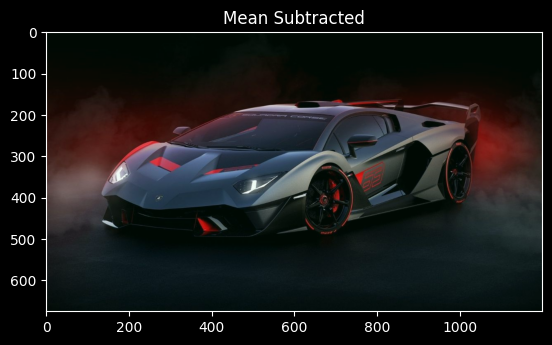

In [12]:
if img is not None:
    # Tính giá trị trung bình của từng kênh màu và trừ đi
    mean_val = np.mean(img_rgb, axis=(0, 1))
    mean_subtracted = img_rgb.astype("float32") - mean_val
    # Chuẩn hóa về khoảng [0, 255] để hiển thị
    mean_subtracted = cv2.normalize(mean_subtracted, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    plt.imshow(mean_subtracted)
    plt.title('Mean Subtracted')
    plt.show()


### Blobs Detection (Phát hiện Blob)


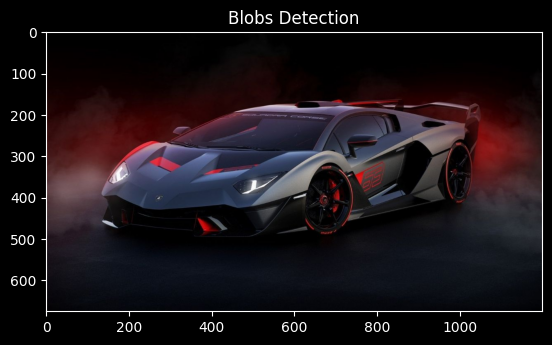

In [13]:
if img is not None:
    detector = cv2.SimpleBlobDetector_create()
    keypoints = detector.detect(gray_img)
    # Vẽ các blob phát hiện được
    img_with_blobs = cv2.drawKeypoints(img_rgb, keypoints, np.array([]), (0, 0, 255),
                                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_blobs)
    plt.title('Blobs Detection')
    plt.show()
